In [1]:
import sys
print(sys.executable)

E:\Anaconda\anaconda3\envs\pytorch\python.exe


In [2]:
# 导入Python的数据处理库pandas, 相当于python里的excel
import pandas as pd

#导入python高级数据可视化库seaborn
import seaborn as sns

# 导入python绘图matplotlib
import matplotlib.pyplot as plt

#使用ipython的魔法方法, 将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

from sklearn.model_selection import train_test_split

#设置绘图大小
plt.style.use({'figure.figsize':(25,20)}) # 给画的图指定大小, 长25, 宽20

#这两个用来显示中文字符
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

```
波士顿房价数据集来源于1978年美国某经济学杂志上。该数据集包含若干波士顿房屋的价格及其各项数据，每个数据项包含14个数据，分别是犯罪率、是否在河边和平均房间数等相关信息，其中最后一个数据是房屋中间价。

数据来源:https:/larchive.ics.uci.edu/ml/datasets/Housing

变量名称解释
·CRIM: per capita crime rate by town 每个城镇人均犯罪率
·ZN: proportion of residential land zoned for lots over 25,000 sq.ft.超过25000平方英尺用地划为居住用地的百分比
·INDUS: proportion of non-retail business acres per town非零售商用地百分比
·CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)是否靠近查尔斯河
·NOX: nitric oxides concentration (parts per 10 million)氮氧化物浓度
·RM: average number of rooms per dwelling住宅平均房间数目
·AGE: proportion of owner-occupied units built prior to 1940 1940年前建成自用单位比例
·DlS: weighted distances to five Boston employment centres到5个波士顿就业服务中心的加权距离
·RAD: index of accessibility te-radial highways无障碍径向高速公路指数
·TAX: full-value property-taxate per $10,000每万元物业税率

·PTRATIO: pupil-teacher ratio by town小学师生比例
·B:1000(Bk - 0.63)/2 where Bk is the proportion of blacks by town 黑人比例指数
·LSTAT: % lower status of the population下层经济阶层比例
·MEDV: Median value of owner-occupied homes in $1000's 业主自住房屋中值
```

## 从外部csv文件导入

In [3]:
df_chinese= pd.read_csv('./boston_house_price_Chinese.csv',encoding='gbk')
df_english= pd.read_csv('./boston_house_price_english.csv')

In [4]:
df_chinese.head()

,犯罪率,住宅用地所占比例,城镇中非商业用地所占比例,是否处于查尔斯河边,一氧化碳浓度,住宅房间数,1940年以前建成的业主自住单位的占比,距离波士顿5个商业中心的加权平均距离,距离高速公路的便利指数,不动产权税,学生/教师比例,黑人比例,低收入阶层占比,房价中位数
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df_english.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df_english.shape

(506, 14)

In [7]:
df_chinese.shape

(506, 14)

## 数据探索性分析(EDA) 

### 探索数据结构

In [8]:
df_chinese.head()

,犯罪率,住宅用地所占比例,城镇中非商业用地所占比例,是否处于查尔斯河边,一氧化碳浓度,住宅房间数,1940年以前建成的业主自住单位的占比,距离波士顿5个商业中心的加权平均距离,距离高速公路的便利指数,不动产权税,学生/教师比例,黑人比例,低收入阶层占比,房价中位数
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df_chinese.shape

(506, 14)

In [10]:
df_chinese.dtypes

犯罪率                    float64
住宅用地所占比例               float64
城镇中非商业用地所占比例           float64
是否处于查尔斯河边                int64
一氧化碳浓度                 float64
住宅房间数                  float64
1940年以前建成的业主自住单位的占比    float64
距离波士顿5个商业中心的加权平均距离     float64
距离高速公路的便利指数              int64
不动产权税                    int64
学生/教师比例                float64
黑人比例                   float64
低收入阶层占比                float64
房价中位数                  float64
dtype: object

In [11]:
df_chinese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   犯罪率                  506 non-null    float64
 1   住宅用地所占比例             506 non-null    float64
 2   城镇中非商业用地所占比例         506 non-null    float64
 3   是否处于查尔斯河边            506 non-null    int64  
 4   一氧化碳浓度               506 non-null    float64
 5   住宅房间数                506 non-null    float64
 6   1940年以前建成的业主自住单位的占比  506 non-null    float64
 7   距离波士顿5个商业中心的加权平均距离   506 non-null    float64
 8   距离高速公路的便利指数          506 non-null    int64  
 9   不动产权税                506 non-null    int64  
 10  学生/教师比例              506 non-null    float64
 11  黑人比例                 506 non-null    float64
 12  低收入阶层占比              506 non-null    float64
 13  房价中位数                506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
df_chinese.isnull().any().sum()

0

In [13]:
df_chinese.describe()

,犯罪率,住宅用地所占比例,城镇中非商业用地所占比例,是否处于查尔斯河边,一氧化碳浓度,住宅房间数,1940年以前建成的业主自住单位的占比,距离波士顿5个商业中心的加权平均距离,距离高速公路的便利指数,不动产权税,学生/教师比例,黑人比例,低收入阶层占比,房价中位数
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
df_english.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## 数据可视化

In [15]:
# 设置绘图大小
plt.style.use({'figure.figsize':(15,10)})

array([[<AxesSubplot:title={'center':'犯罪率'}>,
        <AxesSubplot:title={'center':'住宅用地所占比例'}>,
        <AxesSubplot:title={'center':'城镇中非商业用地所占比例'}>,
        <AxesSubplot:title={'center':'是否处于查尔斯河边'}>],
       [<AxesSubplot:title={'center':'一氧化碳浓度'}>,
        <AxesSubplot:title={'center':'住宅房间数'}>,
        <AxesSubplot:title={'center':'1940年以前建成的业主自住单位的占比'}>,
        <AxesSubplot:title={'center':'距离波士顿5个商业中心的加权平均距离'}>],
       [<AxesSubplot:title={'center':'距离高速公路的便利指数'}>,
        <AxesSubplot:title={'center':'不动产权税'}>,
        <AxesSubplot:title={'center':'学生/教师比例'}>,
        <AxesSubplot:title={'center':'黑人比例'}>],
       [<AxesSubplot:title={'center':'低收入阶层占比'}>,
        <AxesSubplot:title={'center':'房价中位数'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

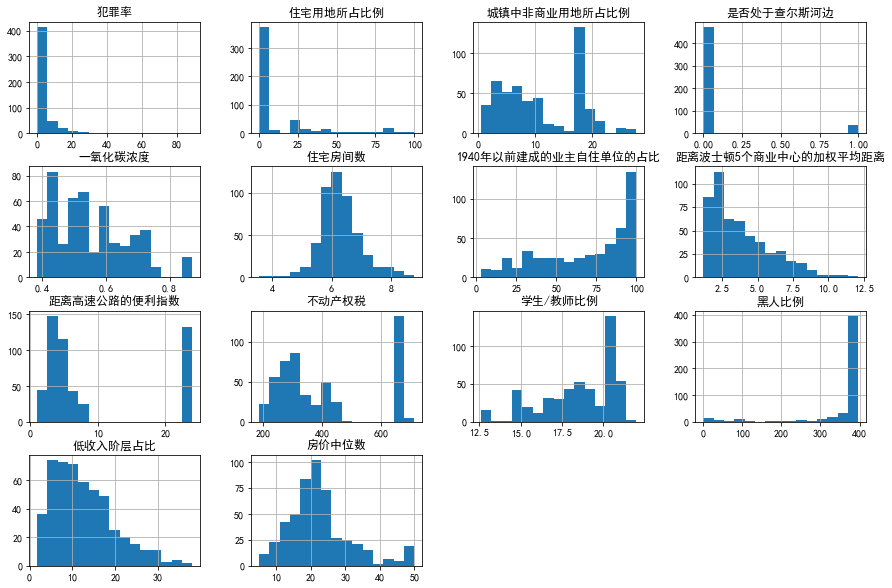

In [16]:
df_chinese.hist(bins=15) # 画出直方图, 15表示分为15个区段 

In [17]:
# 绘制变量之前两两关系的散点图,绘制这个图可能要花一分钟左右

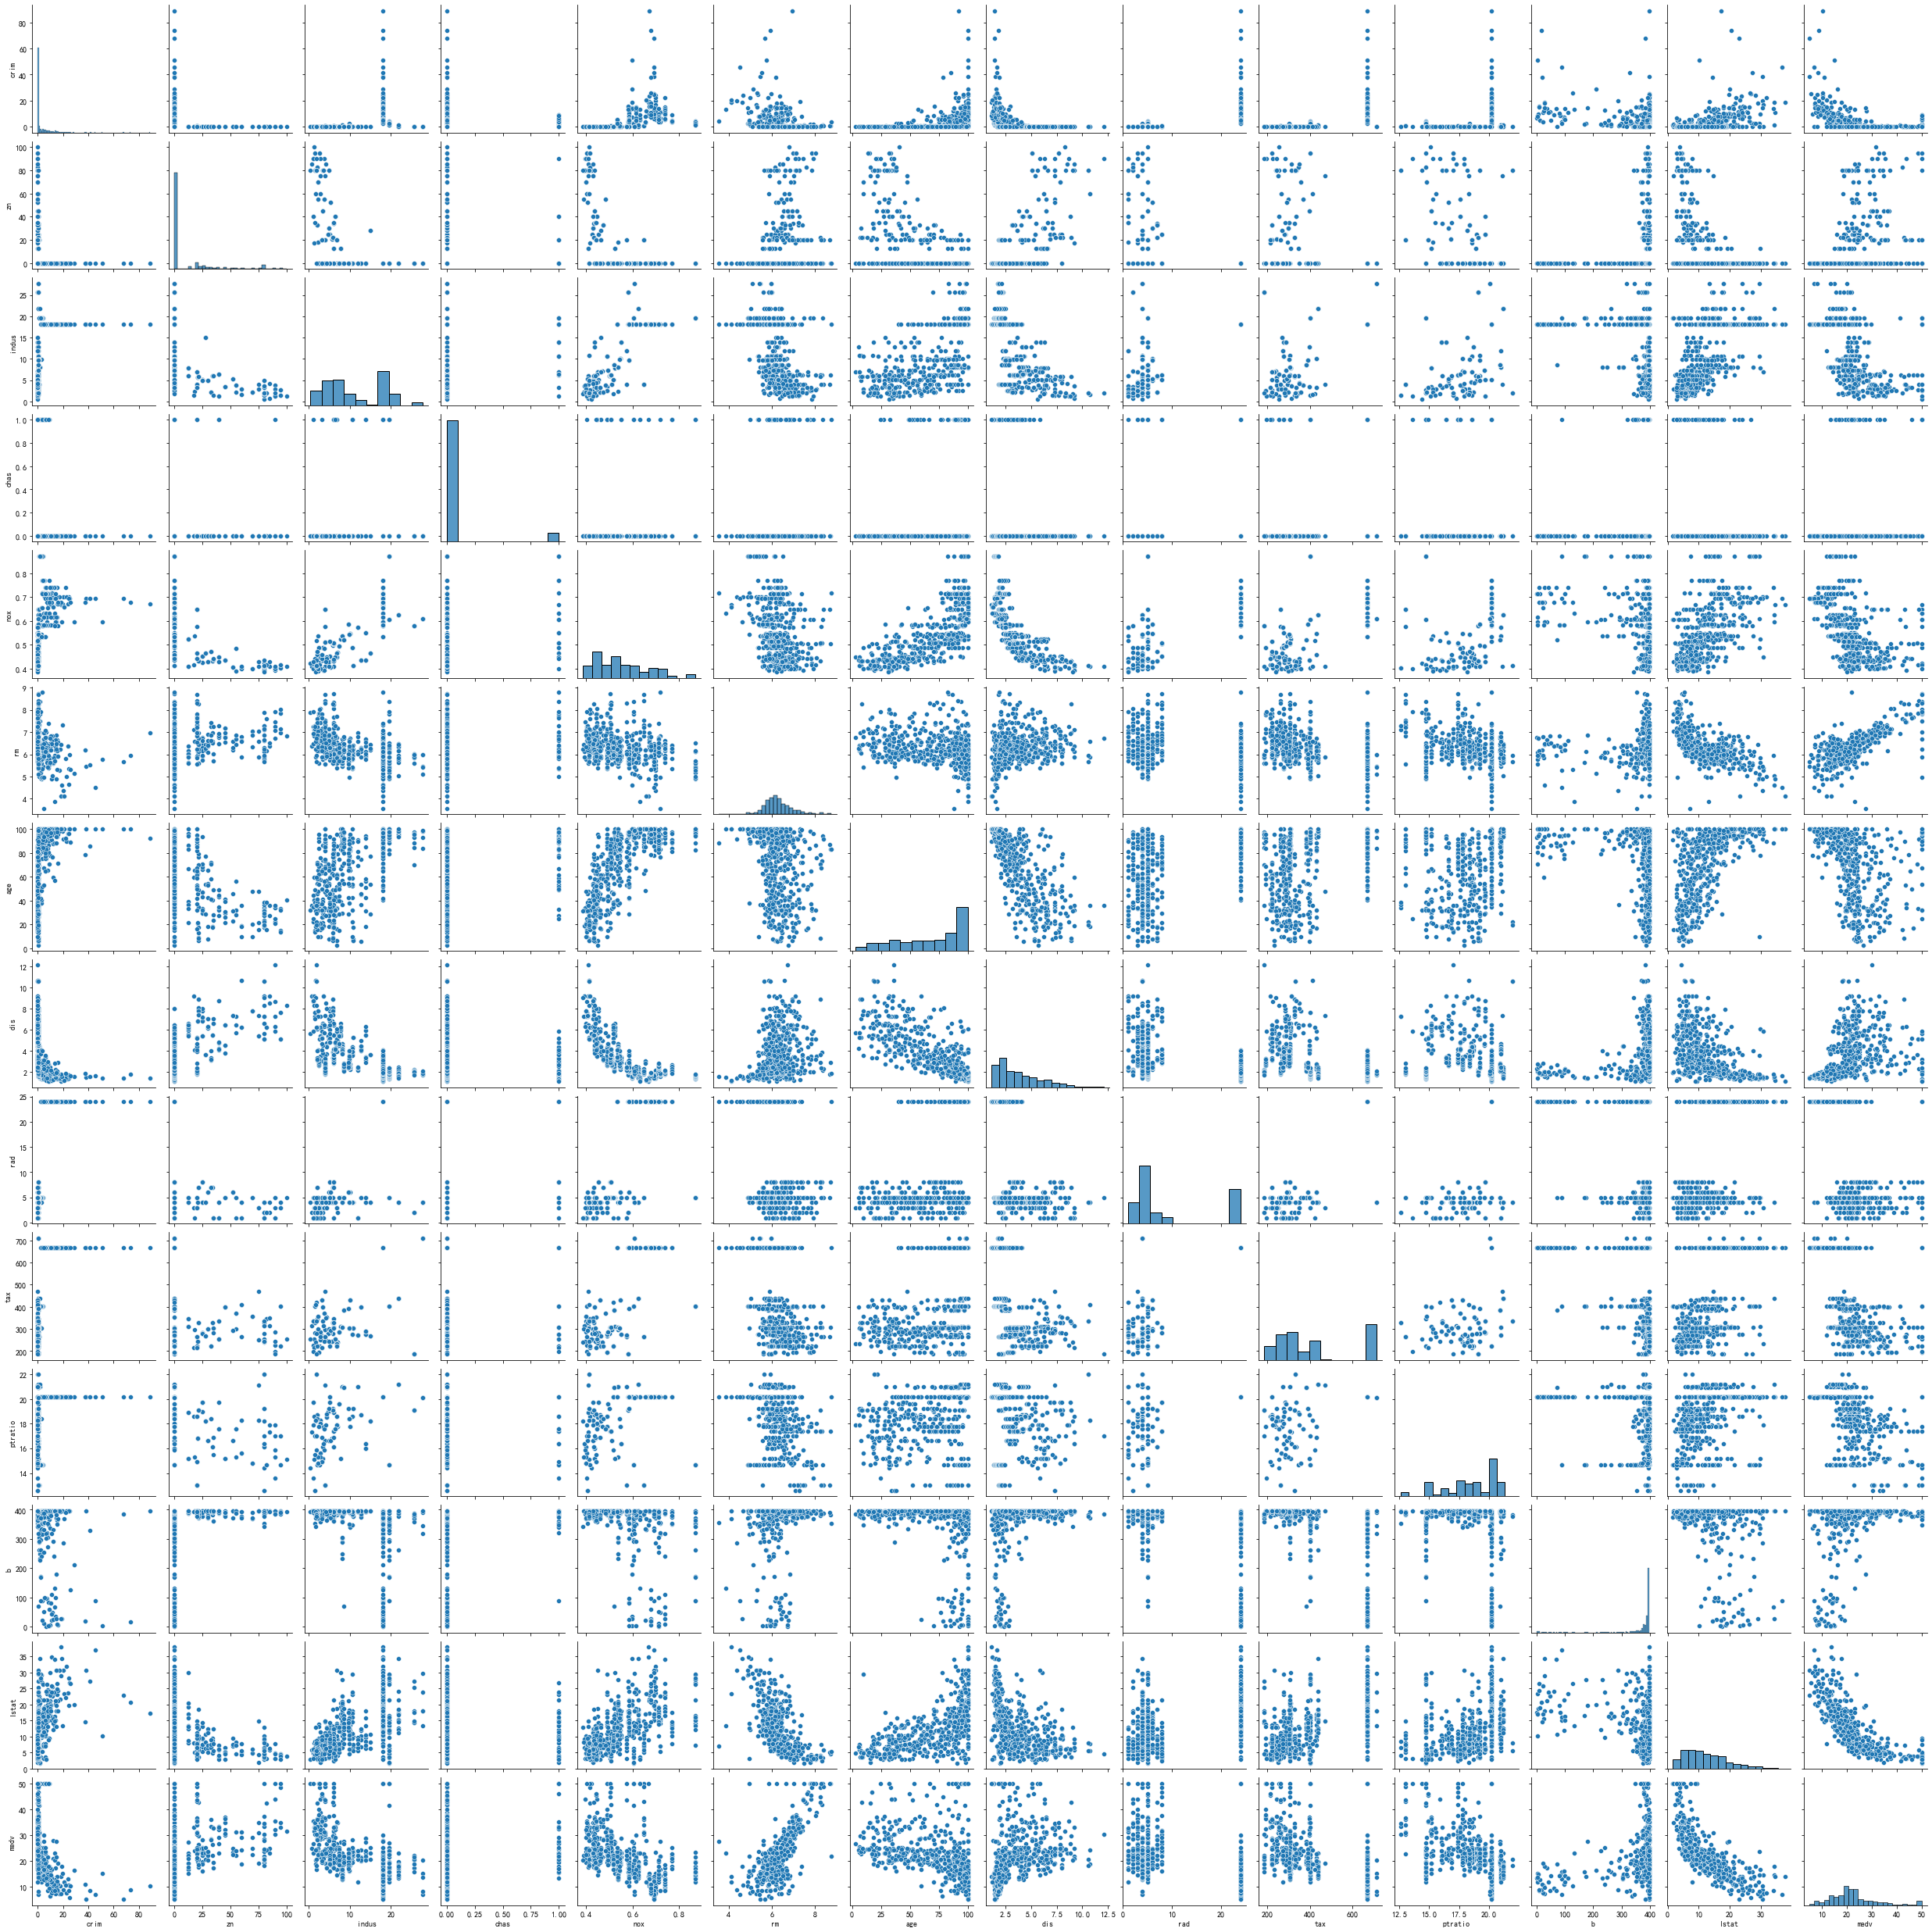

In [18]:
sns.pairplot(df_english)

<AxesSubplot:>

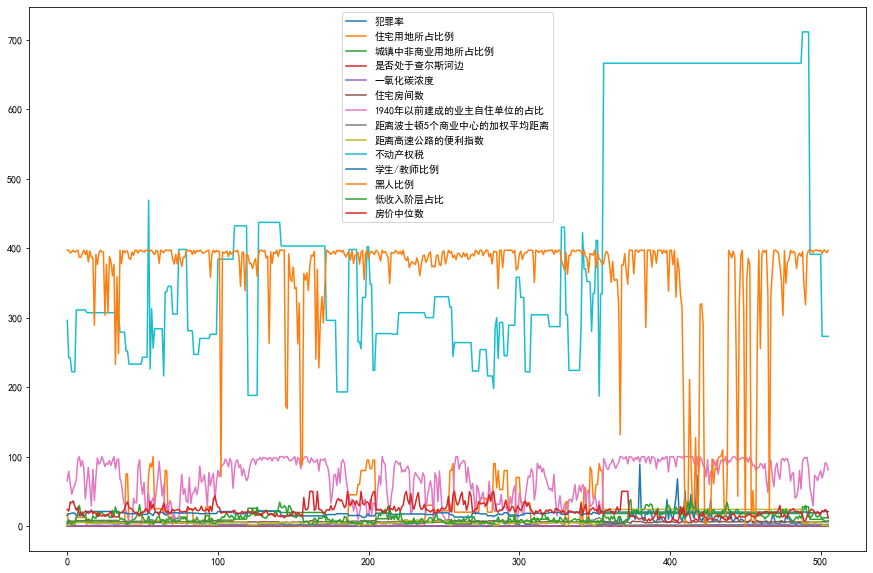

In [19]:
df_chinese.plot()  # 这个图没有什么含义, 只是为了一个可视化效果

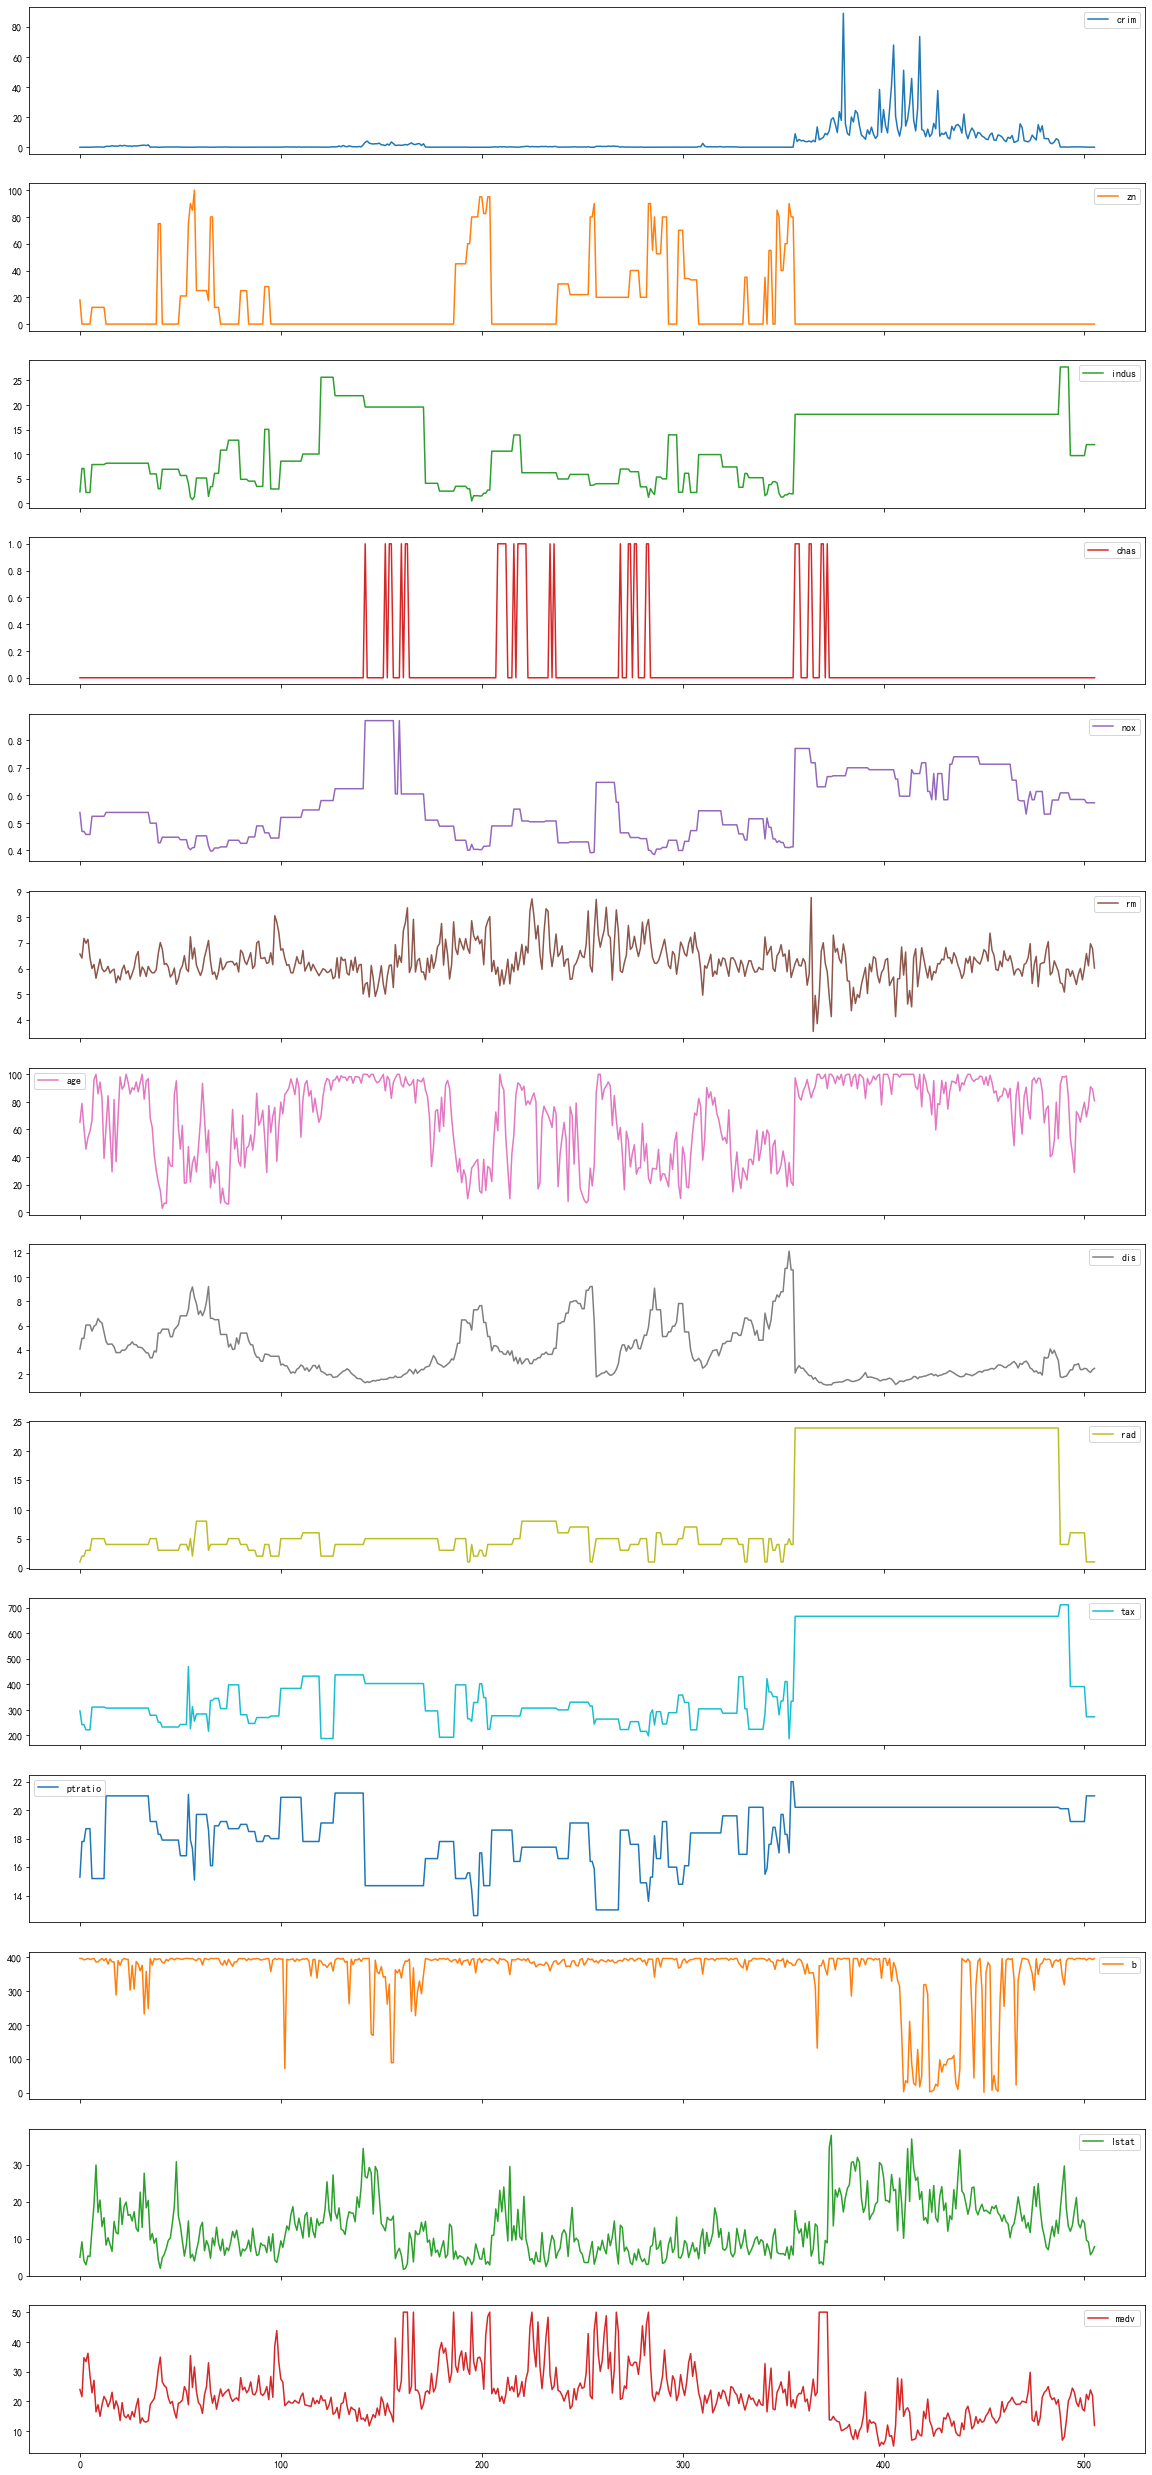

In [20]:
df_english.plot(subplots=True,figsize=(20,45))
plt.show()

<AxesSubplot:ylabel='Frequency'>

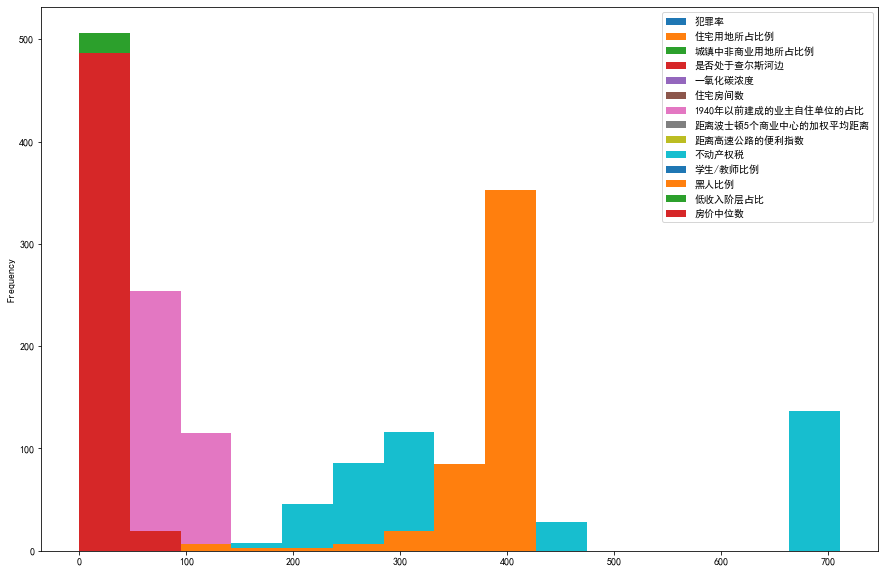

In [21]:
df_chinese.plot(kind='hist', bins=15)

Text(0.5, 1.0, '波士顿房价数据集,一些特征的箱型图')

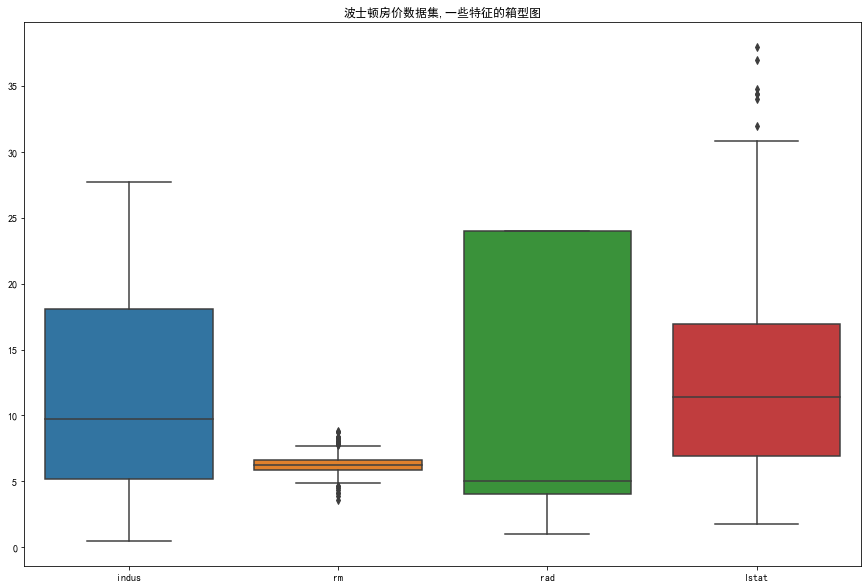

In [22]:
sns.boxplot(data=df_english[['indus','rm','rad','lstat']])
plt.title('波士顿房价数据集,一些特征的箱型图')

Text(0.5, 1.0, '波士顿房价数据集,一些特征的小提琴图')

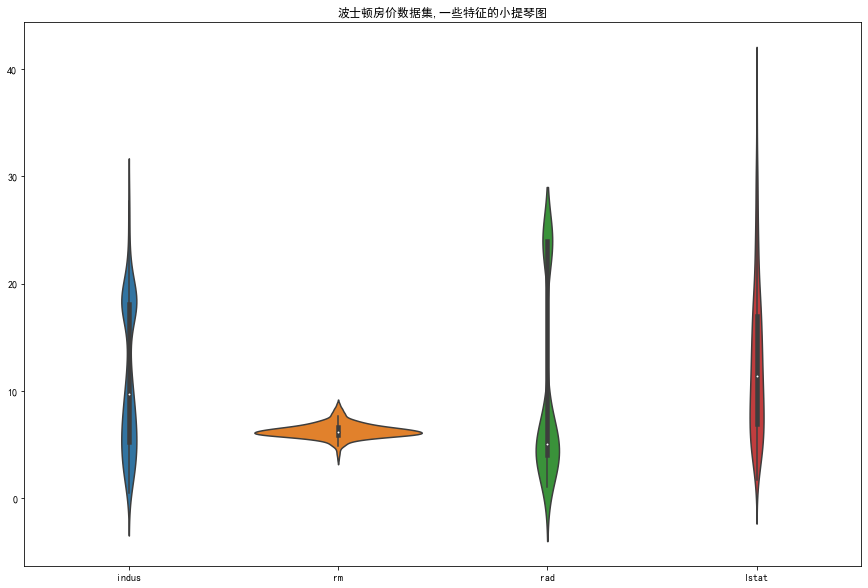

In [23]:
sns.violinplot(data=df_english[['indus','rm','rad','lstat']])
plt.title('波士顿房价数据集,一些特征的小提琴图')

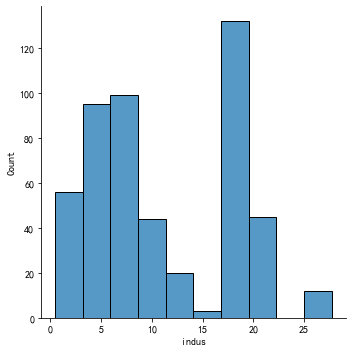

In [24]:
sns.displot(df_english['indus']) # 这个方法好像弃用了

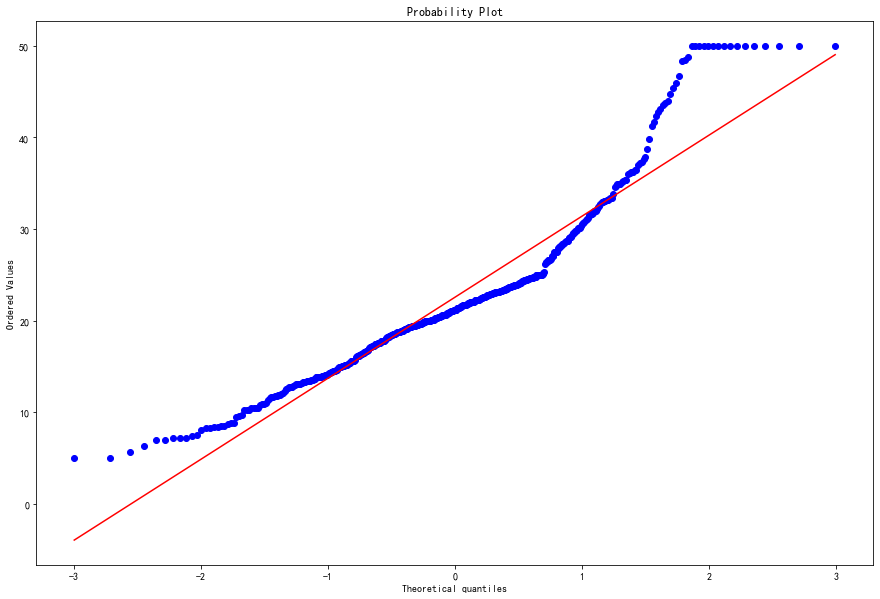

In [25]:
from scipy import stats
res = stats.probplot(df_english['medv'],plot=plt)

<AxesSubplot:>

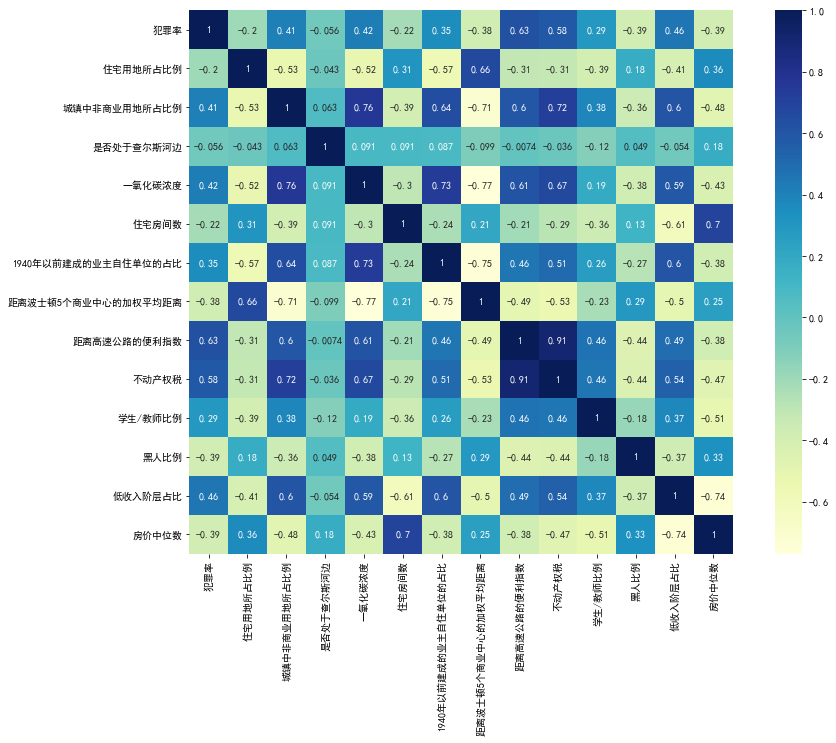

In [26]:
sns.heatmap(df_chinese.corr(),square=True,annot=True,cmap='YlGnBu') # 热力图  14个特征中两两变量之间的皮尔森相关系数

In [27]:
# 设置绘图大小
plt.style.use({'figure.figsize':(10,8)})

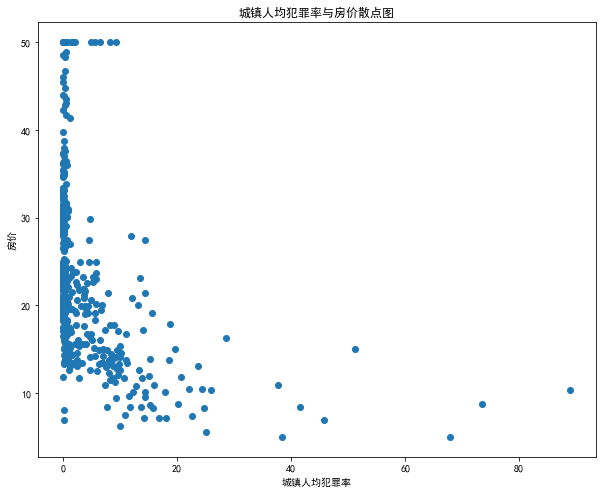

In [28]:
# 把每一个特征与房价之间的散点图绘制出来
plt.scatter(df_chinese['犯罪率'],df_chinese['房价中位数'])
plt.title('城镇人均犯罪率与房价散点图')
plt.xlabel('城镇人均犯罪率')
plt.ylabel('房价')
plt.show()

In [29]:
df_chinese.columns

Index(['犯罪率', '住宅用地所占比例', '城镇中非商业用地所占比例', '是否处于查尔斯河边', '一氧化碳浓度', '住宅房间数',
       '1940年以前建成的业主自住单位的占比', '距离波士顿5个商业中心的加权平均距离', '距离高速公路的便利指数', '不动产权税',
       '学生/教师比例', '黑人比例', '低收入阶层占比', '房价中位数'],
      dtype='object')

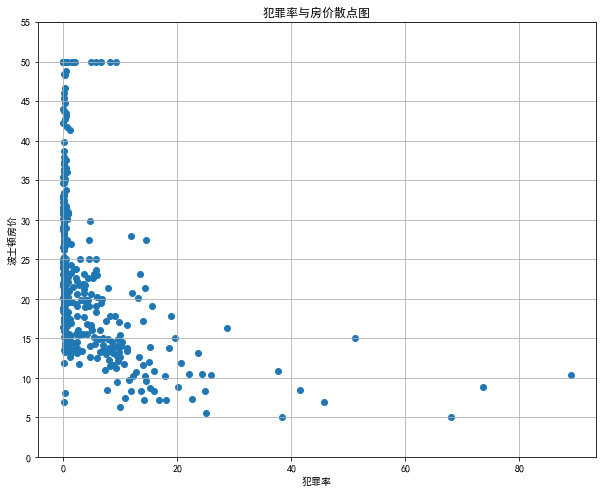

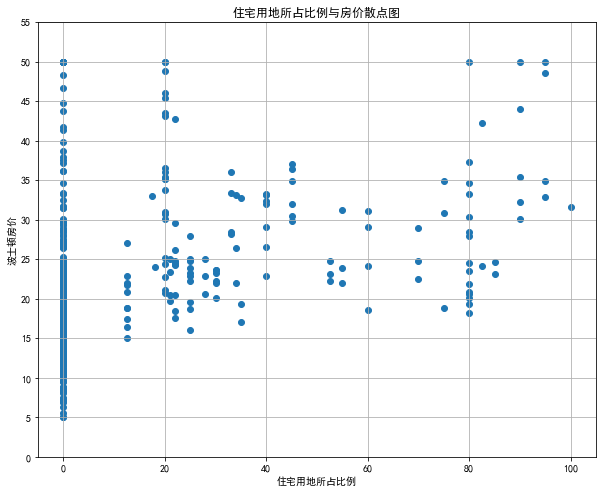

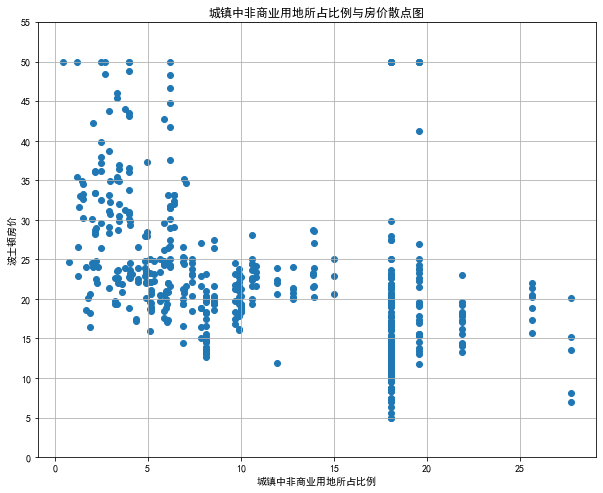

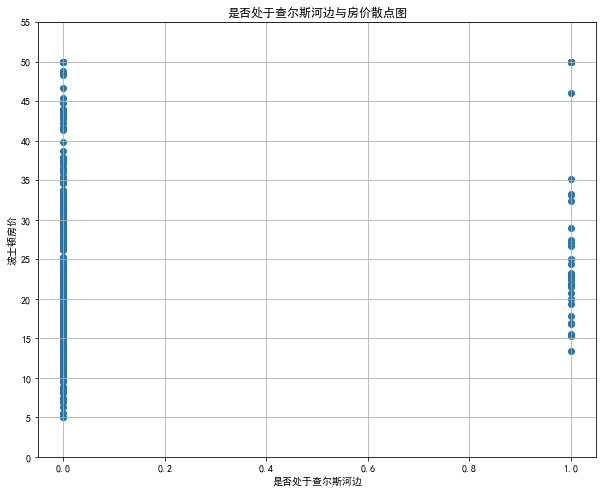

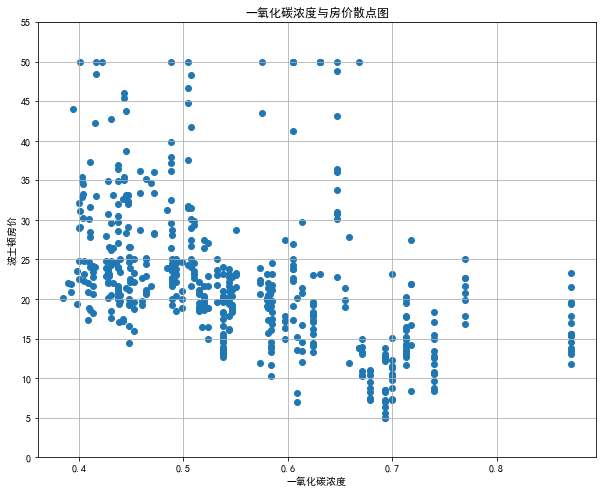

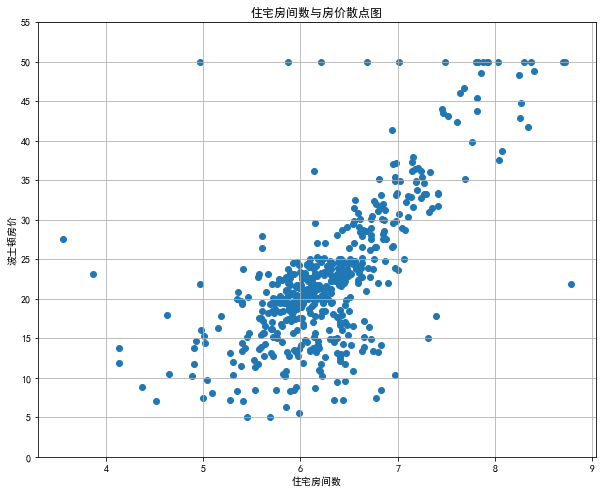

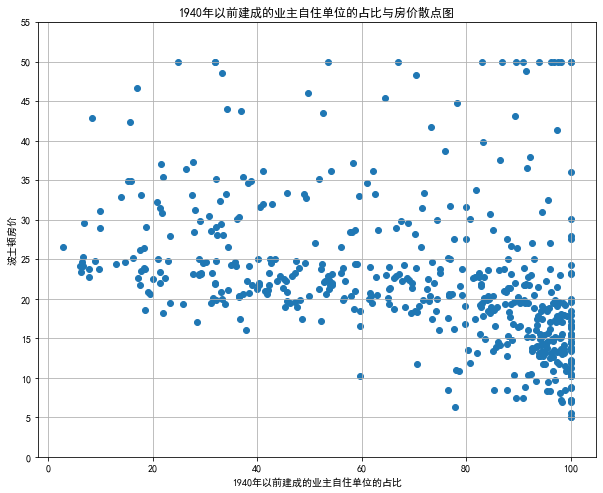

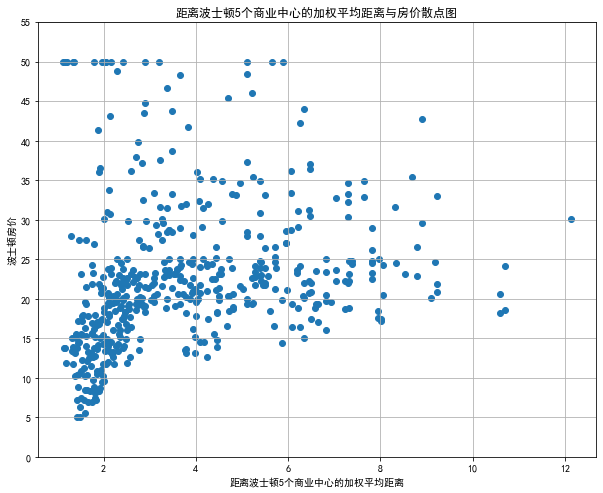

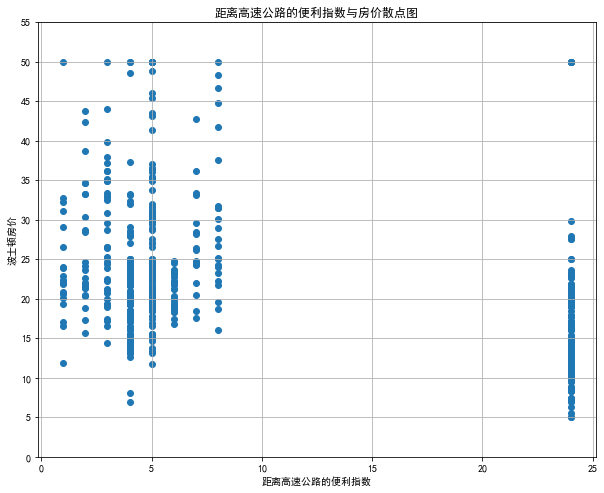

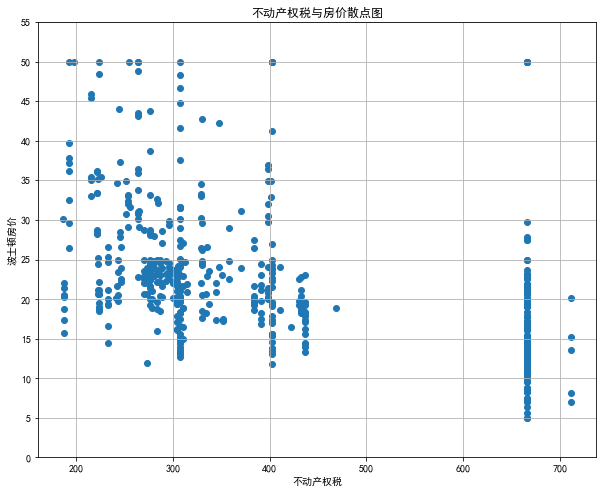

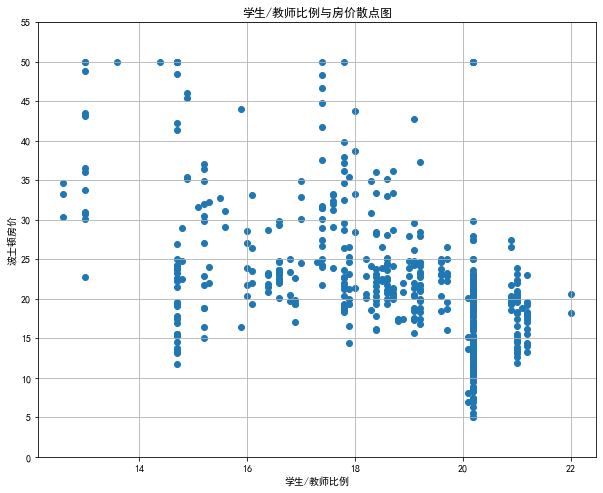

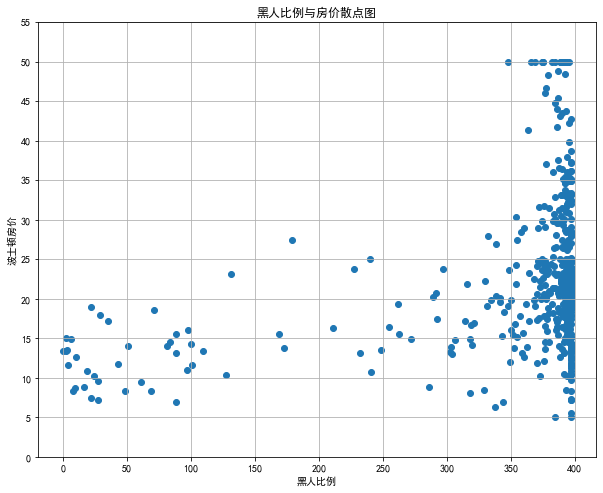

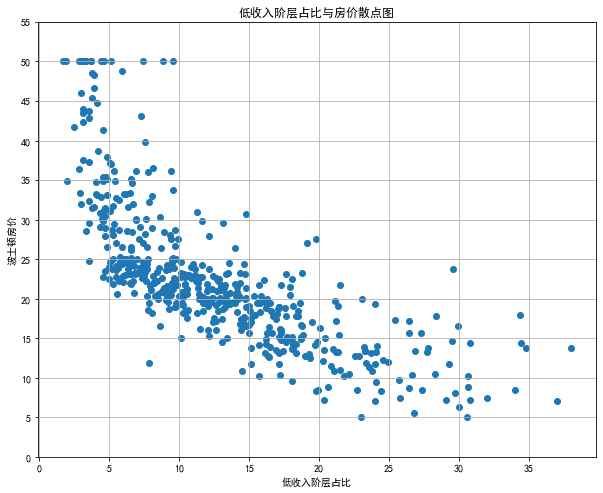

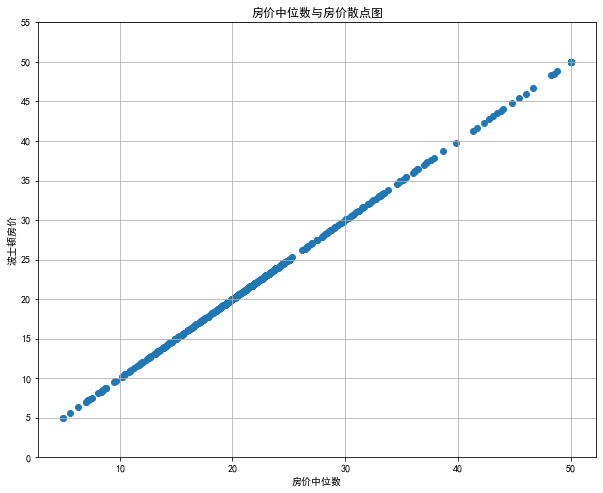

In [30]:
for each in df_chinese.columns:
    plt.scatter(df_chinese[each],df_chinese['房价中位数'])
    plt.title('{}与房价散点图'.format(each))
    plt.xlabel(each)
    plt.ylabel('波士顿房价')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

## 特征选择

使用与目标变量的相关性强的变量作为最终的特征变量

使用相关系数法进行特征选择

In [31]:
df_chinese.head()

,犯罪率,住宅用地所占比例,城镇中非商业用地所占比例,是否处于查尔斯河边,一氧化碳浓度,住宅房间数,1940年以前建成的业主自住单位的占比,距离波士顿5个商业中心的加权平均距离,距离高速公路的便利指数,不动产权税,学生/教师比例,黑人比例,低收入阶层占比,房价中位数
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
# 构造训练数据集的特征
drop_columns = ['房价中位数']
x = df_chinese.drop(drop_columns,axis=1)

In [33]:
x.head()

,犯罪率,住宅用地所占比例,城镇中非商业用地所占比例,是否处于查尔斯河边,一氧化碳浓度,住宅房间数,1940年以前建成的业主自住单位的占比,距离波士顿5个商业中心的加权平均距离,距离高速公路的便利指数,不动产权税,学生/教师比例,黑人比例,低收入阶层占比
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [34]:
y = df_chinese['房价中位数']

In [35]:
from sklearn.feature_selection import SelectKBest    # 最影响结果的K个特征
from sklearn.feature_selection import f_regression
SelectKBest = SelectKBest(f_regression,k=3)
bestFeature = SelectKBest.fit_transform(x,y)          # fit_transform(X[, y])，拟合数据，然后转换数据。
SelectKBest.get_support()  
x.columns[SelectKBest.get_support()]                  # get_support([indices])，获取所选特征的掩码或整数索引。

Index(['住宅房间数', '学生/教师比例', '低收入阶层占比'], dtype='object')

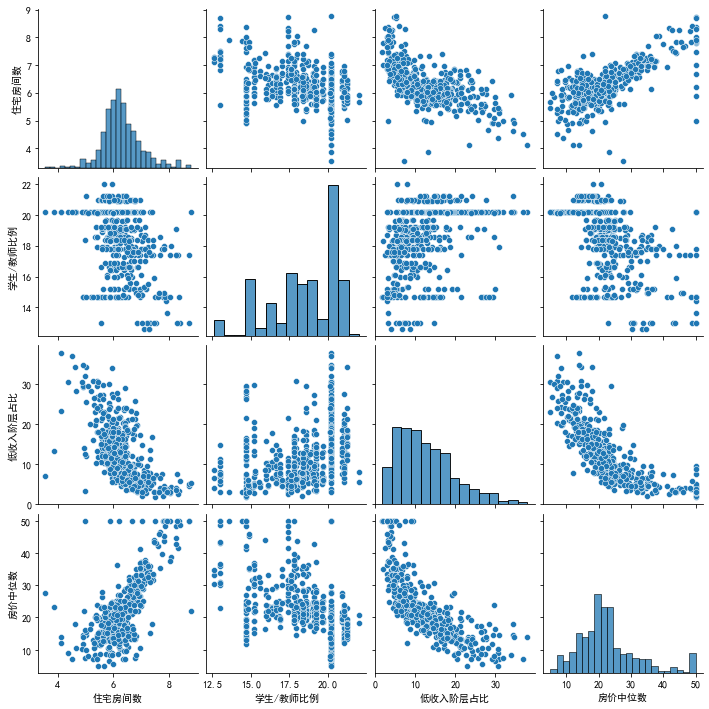

In [36]:
sns.pairplot(df_chinese[['住宅房间数','学生/教师比例','低收入阶层占比','房价中位数']])  # pair:成对  pairplot:两两关系图

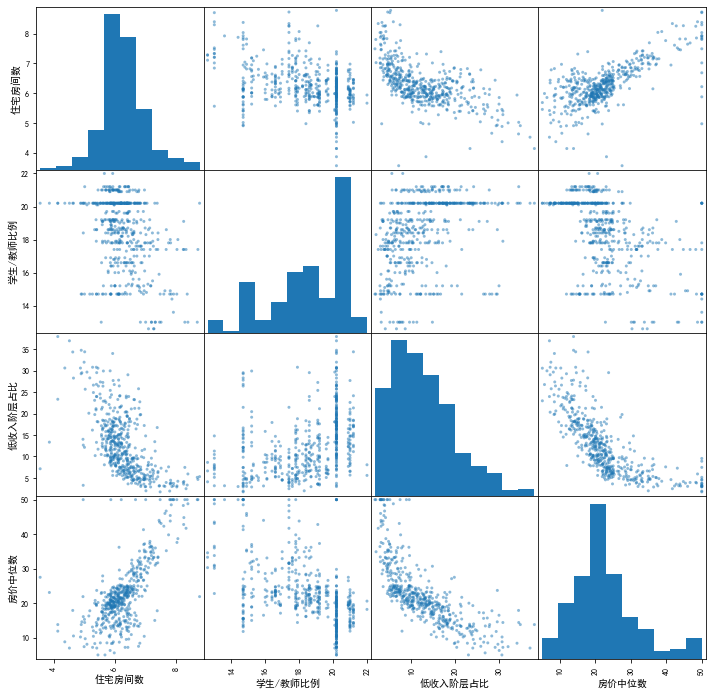

In [37]:
# 这是采用pandas里的方法绘制的图

cols = ['住宅房间数','学生/教师比例','低收入阶层占比','房价中位数']

# 散布矩阵(scatter_matrix)
# alpha：(float, 可选)， 图像透明度，一般取(0,1]
# figsize: ((float,float), 可选)，以英寸为单位的图像大小，一般以元组 (width, height) 形式设置
pd.plotting.scatter_matrix(df_chinese[cols],alpha=0.5,figsize=(12,12)) 
plt.show()

In [38]:
df_chinese.corr()

,犯罪率,住宅用地所占比例,城镇中非商业用地所占比例,是否处于查尔斯河边,一氧化碳浓度,住宅房间数,1940年以前建成的业主自住单位的占比,距离波士顿5个商业中心的加权平均距离,距离高速公路的便利指数,不动产权税,学生/教师比例,黑人比例,低收入阶层占比,房价中位数
犯罪率,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
住宅用地所占比例,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
城镇中非商业用地所占比例,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
是否处于查尔斯河边,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
一氧化碳浓度,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
住宅房间数,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
1940年以前建成的业主自住单位的占比,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
距离波士顿5个商业中心的加权平均距离,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
距离高速公路的便利指数,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
不动产权税,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# 特征归一化

In [39]:
# 因为在神经网络里, 对输入数据的幅度比较敏感. 
from sklearn.preprocessing import MinMaxScaler  # preprocessing: sklearn里的预处理模块  MinMaxScaler:最大最小值的归一化
scaler = MinMaxScaler()
for feature in df_english.columns:
    df_english['标准化'+feature] = scaler.fit_transform(df_english[[feature]])

In [40]:
df_english.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,标准化nox,标准化rm,标准化age,标准化dis,标准化rad,标准化tax,标准化ptratio,标准化b,标准化lstat,标准化medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
